# Numerical Solution


In [1]:
using CairoMakie
using ModelingToolkit
using DifferentialEquations: solve

## Euler Methods


In [2]:
function euler_forward(t, n_steps, y₀)
    f = zeros(size(t))
    y = zeros(size(t))
    y[1] = y₀
    y[2] = f[end-1]

    for ii = 1:n_steps
        f[ii] = 3 + exp(-t[ii]) - 2y[ii]
        y[ii+1] = y[ii] + f[ii] * h
    end
    return y
end

function euler_improved(t, n_steps, y₀)
    f = zeros(size(t))
    f[1] = 3 + exp(-t[1]) - 2y₀
    y = zeros(size(t))
    y[1] = y₀
    for ii = 1:n_steps
        f[ii+1] = 3 + exp(-(t[ii] + h)) - 2(y[ii] + h * f[ii])
        y[ii+1] = y[ii] + (f[ii] + f[ii+1]) * (h / 2)
    end
    return y
end

function euler_backward(T, n_steps, y₀)
    f = zeros(n_steps + 1)
    y_new = zeros(n_steps + 1)
    y = zeros(n_steps + 1)
    y[1] = y₀

    for ii = 1:n_steps
        T[ii+1] = T[ii] + h
        f[ii] = 3 - 2y[ii] + exp(-T[ii])
        y_new[ii] = y[ii] + h * f[ii]
        f[ii+1] = 3 - 2y_new[ii] + exp(-T[ii+1])
        y[ii+1] = y[ii] + f[ii+1] * h
    end
    return y
end

euler_backward (generic function with 1 method)

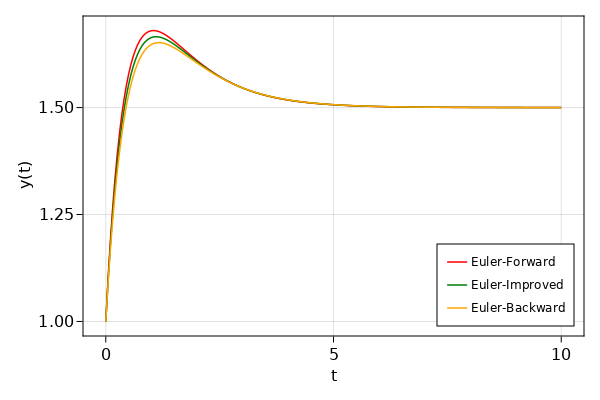

In [3]:
t₀ = 0;
tₙ = 10;
h = 0.05;
t = t₀:h:tₙ;
n_steps = length(t) - 1;
y₀ = 1;

y₁ = euler_forward(t, n_steps, y₀);
y₂ = euler_improved(t, n_steps, y₀);

T = zeros(n_steps + 1);
y₃ = euler_backward(T, n_steps, y₀);

colors = [:red :green :orange];
labels = ["Euler-Forward", "Euler-Improved", "Euler-Backward"];

fig = Figure(resolution = (600, 400))
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "y(t)")

lines!(ax, t, y₁, color = colors[1], linewidth = 1.5, label = labels[1])
lines!(ax, t, y₂, color = colors[2], linewidth = 1.5, label = labels[2])
lines!(ax, T, y₃, color = colors[3], linewidth = 1.5, label = labels[3])
axislegend(ax; position = :rb, labelsize = 12)
fig

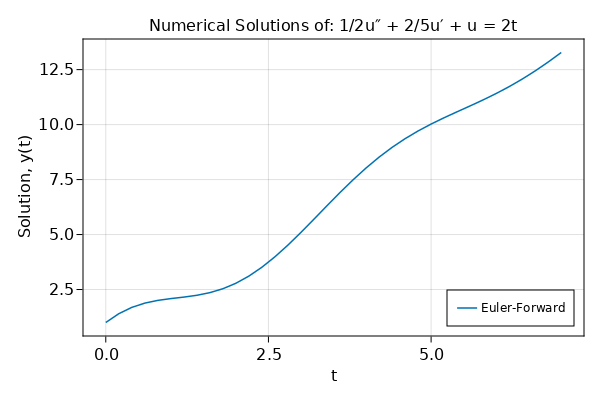

In [4]:
h = 0.2; # time step size()
t₀ = 0; # Start of simulations
tₙ = 7; # End of simulations
t = t₀:h:tₙ
n_steps = length(t);
u = zeros((n_steps, 2))
u[1, :] = [1.0, 2.0]

for ii = 2:n_steps
    f = [u[ii-1, 2], 4t[ii] - (4 / 5) * u[ii-1, 2] - 2u[ii-1, 1]]
    u[ii, :] = u[ii-1, :] + f * h
end

fig = Figure(resolution = (600, 400))
ax = Axis(
    fig[1, 1],
    xlabel = "t",
    ylabel = "Solution, y(t)",
    title = "Numerical Solutions of: 1/2u″ + 2/5u′ + u = 2t",
)

lines!(ax, t, u[:, 1], label = "Euler-Forward")
axislegend(ax, position = :rb, labelsize = 12)
fig

## Runge Kutta Methods


In [5]:
function runge_kutta(t, n_steps, y₀)
    k₁ = zeros(1, n_steps)
    k₂ = k₁
    k₃ = k₁
    k₄ = k₁
    y = zeros(n_steps + 1)
    y[1] = y₀

    for ii = 1:n_steps
        k₁[ii] = 3 + exp(-t[ii]) - 2y[ii]
        k₂[ii] = 3 + exp(-(t[ii] + h / 2)) - 2(y[ii] + k₁[ii] * h / 2)
        k₃[ii] = 3 + exp(-(t[ii] + h / 2)) - 2(y[ii] + k₂[ii] * h / 2)
        k₄[ii] = 3 + exp(-(t[ii] + h)) - 2(y[ii] + k₃[ii] * h)
        y[ii+1] = y[ii] + h * (k₁[ii] + 2k₂[ii] + 2k₃[ii] + k₄[ii]) / 6
    end
    return y
end

runge_kutta (generic function with 1 method)

In [6]:
@variables ts ys(ts)
@parameters e

D = Differential(ts)
@named runge_kutta_s = ODESystem(D(ys) ~ -2ys + e^(-ts) + 3)

prob = ODEProblem(runge_kutta_s, [ys => 1.0], (0.0, 10.0), [e => ℯ])
sol = solve(prob);

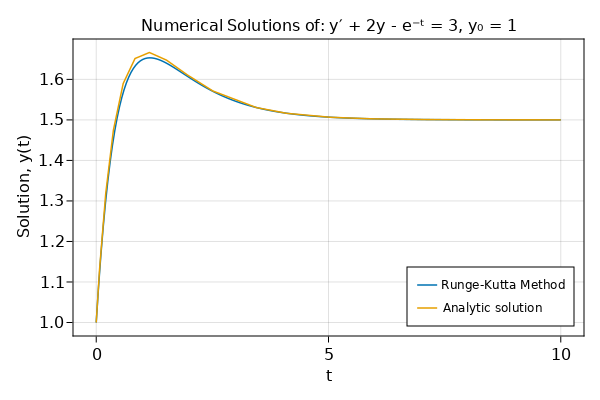

In [7]:
t₀ = 0;
tₙ = 10;
h = 0.05;
t = t₀:h:tₙ;
n_steps = length(t) - 1;
y₀ = 1;

y = runge_kutta(t, n_steps, y₀)

fig = Figure(resolution = (600, 400))
ax = Axis(
    fig[1, 1],
    xlabel = "t",
    ylabel = "Solution, y(t)",
    title = "Numerical Solutions of: y′ + 2y - e⁻ᵗ = 3, y₀ = 1",
)

lines!(ax, t, y, linewidth = 1.5, label = "Runge-Kutta Method")
lines!(ax, sol.t, vcat(sol.u...), linewidth = 1.5, label = "Analytic solution")
axislegend(ax, position = :rb, labelsize = 12)
fig